# Natural Language Processing

In [1]:
import nltk
#Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Math
import math

#Plot
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

import json
from pprint import pprint
from pandas.io.json import json_normalize

In [2]:
data = pd.read_json('C:/Users/meena/Documents/Information_Systems/test.json',orient='columns',lines=True)
data

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,3rTr1LTMj6MIExjCVaiWKw,0,2013-01-18,3,b5rtxpEZwjbarORy0b3OvA,4,WInner's @ College Park is my fav.\n\nDo you a...,review,2,Gf8Jew6GZHKCk2F6kPZh5Q
1,3rTr1LTMj6MIExjCVaiWKw,0,2015-03-10,0,F8yHURev72jyzKBehkBaKw,4,I was staying at the Courtyard Marriott nearby...,review,0,iqQBsjqOF9xgIAbsZ2sAZA
2,3rTr1LTMj6MIExjCVaiWKw,2,2011-03-07,2,OJlqpJYbBnPztQmmSIovaA,3,There are things I love about Winners-finding ...,review,3,eqWEgMH-DCP74i82BEAZzw
3,3rTr1LTMj6MIExjCVaiWKw,0,2013-06-14,0,1zU1VEHYx7W0LwHd9E8oVA,4,Great location! The clothes were organized rel...,review,0,ChhiVXQulj8zmFDr6x-FqQ
4,3rTr1LTMj6MIExjCVaiWKw,1,2011-03-12,1,HeVesklWabCJJOgjqLhXTA,2,"Well, I had an appointment across the street s...",review,3,CSA-YFyZWlxPTeAZRJqMWA
5,3rTr1LTMj6MIExjCVaiWKw,0,2016-06-16,0,Autqph1ZX7s5RYL6bTC-Ag,4,Great findings at a good price. Easy to go to ...,review,0,sdXpFD4P1NYVCo6hOax6tQ
6,3rTr1LTMj6MIExjCVaiWKw,0,2015-11-06,0,hY-hTadoiCwsrGSvnZz-4w,5,Very good selection of clothes for both and wo...,review,0,1do5ONLSwoLzYt7YKFCWOw
7,3rTr1LTMj6MIExjCVaiWKw,0,2015-06-06,0,rrDLaGJ-Vcg2V7h5zKpJZA,4,This place is amazing you can always find grea...,review,0,vNvAAssb8qBGNlVe5NnYpQ
8,3rTr1LTMj6MIExjCVaiWKw,0,2013-01-21,0,8fe99lEvsBnVDHQsLjMMgA,3,Same shoes from a few days ago! Couldn't find ...,review,0,SkpCulULgiBfLc4lV8vx2g
9,3rTr1LTMj6MIExjCVaiWKw,0,2015-08-08,0,sUDvNRCWgEqc_AppbzI3Ng,4,I went to Winners with my family originally in...,review,1,tFbZ8R11EroqzjfGMdY0gA


In [3]:
data.isnull().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
type           0
useful         0
user_id        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 10 columns):
business_id    2399 non-null object
cool           2399 non-null int64
date           2399 non-null datetime64[ns]
funny          2399 non-null int64
review_id      2399 non-null object
stars          2399 non-null int64
text           2399 non-null object
type           2399 non-null object
useful         2399 non-null int64
user_id        2399 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 187.5+ KB


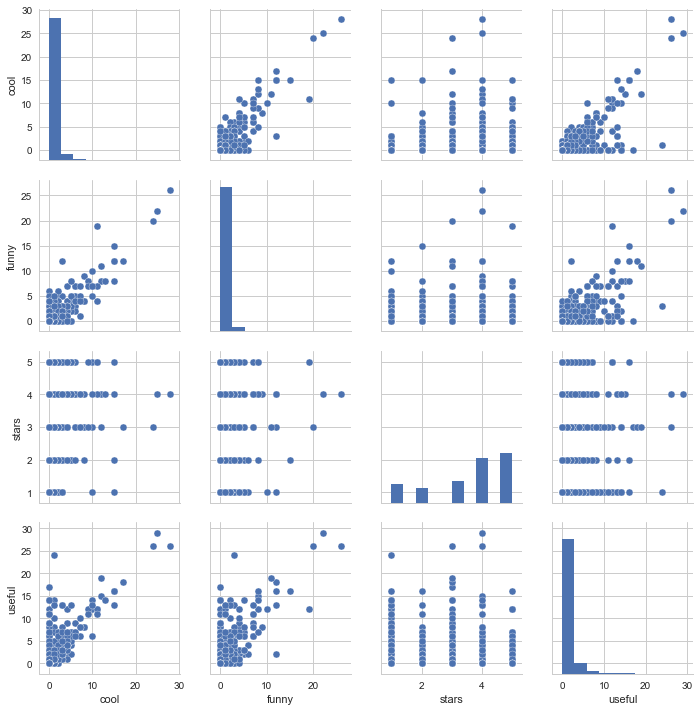

In [5]:
sns.pairplot(data)

In [ ]:
sns.heatmap(data.corr()) 

We will drop the columns which will not be used in sentiment analysis

In [7]:
yelp = data.drop(['business_id','cool','date','funny','review_id','type','useful','user_id'],1)

# Text Processing

There are 3 steps in text processing.

Noise Removal

Lexicon Normalization

Object Standardization

# Noise Removal
Noises are texts not relavant to data. Example:stopworks(a,the,this),URLs,hashtags etc. We will remove them using stopwords from nltk corpus

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
yelp['text'] = yelp['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
yelp

,stars,text
0,4,WInner's @ College Park fav. Do really need ex...
1,4,I staying Courtyard Marriott nearby forgot ite...
2,3,There things I love Winners-finding bargains o...
3,4,Great location! The clothes organized relative...
4,2,"Well, I appointment across street I thought I ..."
5,4,Great findings good price. Easy go College Par...
6,5,Very good selection clothes women lots creams ...
7,4,This place amazing always find great prices gr...
8,3,Same shoes days ago! Couldn't find small sized...
9,4,I went Winners family originally search large ...


# Lexicon Normalization
Lexicons are multiple representation of single word.
There are 2 types of lexicon normalization. 1.Stemming 2.Lemmatization

Stemming: Removal of suffixes (Example: remove ed,ly, ing suffixes)

In [9]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
yelp['text']=yelp['text'].apply(lambda x : filter(None,x.split(" ")))
yelp['text']=yelp['text'].apply(lambda x : [ps.stem(y) for y in x])
yelp

,stars,text
0,4,"[winner', @, colleg, park, fav., Do, realli, n..."
1,4,"[I, stay, courtyard, marriott, nearbi, forgot,..."
2,3,"[there, thing, I, love, winners-find, bargain,..."
3,4,"[great, location!, the, cloth, organ, rel, wel..."
4,2,"[well,, I, appoint, across, street, I, thought..."
5,4,"[great, find, good, price., easi, go, colleg, ..."
6,5,"[veri, good, select, cloth, women, lot, cream,..."
7,4,"[thi, place, amaz, alway, find, great, price, ..."
8,3,"[same, shoe, day, ago!, couldn't, find, small,..."
9,4,"[I, went, winner, famili, origin, search, larg..."


Lemmatization: Replacing words like hashtags and colloquial slangs

In [10]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
yelp['text']=yelp['text'].apply(lambda x : [lem.lemmatize(y) for y in x])
yelp['text']=yelp['text'].apply(lambda x : " ".join(x))
yelp

,stars,text
0,4,winner' @ colleg park fav. Do realli need expl...
1,4,I stay courtyard marriott nearbi forgot items....
2,3,there thing I love winners-find bargain one gr...
3,4,"great location! the cloth organ rel well, staf..."
4,2,"well, I appoint across street I thought I woul..."
5,4,great find good price. easi go colleg park sta...
6,5,veri good select cloth woman lot cream -nice o...
7,4,thi place amaz alway find great price great cl...
8,3,same shoe day ago! couldn't find small size ha...
9,4,I went winner famili origin search larg variet...


# Parts of Speech Tagging
Associate parts of speech like noun and verb with each word in the text is called POS tagging

In [11]:
texts = yelp['text'].tolist()
def part_of_speech(document):
    try:
        for i in document:
            words = nltk.word_tokenize(document)
            tagged = nltk.pos_tag(words)
            print(tagged)
        
    except Exception as e:
        print(str(e))

In [12]:
import re
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(texts))

In [13]:
part_of_speech(letters_only)

[('u', 'JJ'), ('winner', 'NN'), ('colleg', 'NN'), ('park', 'NN'), ('fav', 'NN'), ('Do', 'NNP'), ('realli', 'VB'), ('need', 'VB'), ('explain', 'VB'), ('store', 'NN'), ('you', 'PRP'), ('It', 'PRP'), ('sell', 'VB'), ('after', 'IN'), ('market', 'NN'), ('name', 'NN'), ('brand', 'NN'), ('items', 'NNS'), ('anyways', 'VBZ'), ('here', 'RB'), ('list', 'JJ'), ('whi', 'NN'), ('I', 'PRP'), ('love', 'VBP'), ('winner', 'RB'), ('colleg', 'JJ'), ('park', 'NN'), ('list', 'NN'), ('abba', 'IN'), ('N', 'NNP'), ('stroll', 'NN'), ('here', 'RB'), ('subway', 'VBZ'), ('the', 'DT'), ('cheap', 'JJ'), ('cologn', 'NN'), ('area', 'NN'), ('never', 'RB'), ('GO', 'NNP'), ('wrong', 'JJ'), ('love', 'RB'), ('cologne', 'NN'), ('im', 'NN'), ('middl', 'NN'), ('east', 'JJ'), ('okay', 'JJ'), ('love', 'NN'), ('swim', 'NN'), ('shizz', 'VBD'), ('cute', 'JJ'), ('n', 'JJ'), ('hipster', 'NN'), ('chocol', 'NN'), ('candi', 'NN'), ('snack', 'NN'), ('and', 'CC'), ('hipster', 'NN'), ('I', 'PRP'), ('mean', 'VBP'), ('like', 'IN'), ('gluten

KeyboardInterrupt: 

# Entity Extraction
Entities are important chunks of the sentences.

In [14]:
def chunk(document):
    try:
        for i in document:
            words = nltk.word_tokenize(document)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                print(subtree)
            
        
    except Exception as e:
        print(str(e))

In [15]:
chunk(letters_only)

(Chunk Do/NNP)
(Chunk N/NNP stroll/NN)
(Chunk never/RB GO/NNP)
(Chunk No/NNP eye/NN)
(Chunk St/NNP)
(Chunk So/NNP)
(Chunk zipper/NNP famili/NN)
(Chunk zipper/NNP wasn/NN)
(Chunk S/NNP L/NNP)
(Chunk TJ/NNP)
(Chunk OF/NNP cloth/NN)
(Chunk Im/NNP lucki/NN)
(Chunk u/VB My/NNP)
(Chunk GA/NNP floor/NN)
(Chunk No/NNP complaint/NN)
(Chunk xe/NNP water/NN)
(Chunk A/NNP friend/NN)
(Chunk A/NNP heavi/NN)
(Chunk My/NNP drink/NN)
(Chunk BS/NNP)
(Chunk So/NNP)
(Chunk expected/VBD A/NNP)
(Chunk My/NNP friend/NN)
(Chunk perform/VB My/NNP friend/NN)
(Chunk saw/VBD kenni/NNP chesney/NN)
(Chunk Be/NNP)
(Chunk back/RB GA/NNP floor/NN)
(Chunk live/RB here/RB IT/NNP)
(Chunk No/NNP shoe/NN)
(Chunk Be/NNP)
(Chunk AV/NNP team/NN)
(Chunk again/RB My/NNP hope/NN)
(Chunk So/NNP walk/NN)
(Chunk LA/NNP)
(Chunk E/NNP)
(Chunk CC/NNP seat/NN)
(Chunk DD/NNP seat/NN)
(Chunk away/RB row/VB CC/NNP)
(Chunk My/NNP complaint/NN)
(Chunk My/NNP st/NN)
(Chunk N/NNP)
(Chunk N/NNP)
(Chunk My/NNP issu/NN)
(Chunk elsewhere/RB A/NNP

(Chunk xe/NNP t/NN)
(Chunk xe/NNP plu/NN)
(Chunk xe/NNP cela/NN)
(Chunk xe/NNP renc/NN)
(Chunk Id/NNP)
(Chunk A/NNP littl/NN)
(Chunk xe/NNP al/NN)
(Chunk xe/NNP couverte/NN)
(Chunk xe/NNP abl/NN)
(Chunk xe/NNP lice/NN)
(Chunk paid/VBN No/NNP)
(Chunk My/NNP famili/NN)
(Chunk xe/NNP e/NN)
(Chunk xe/NNP)
(Chunk xe/NNP cor/NN)
(Chunk neighborhood/VBD A/NNP chill/NN)
(Chunk A/NNP)
(Chunk xe/NNP cet/NN)
(Chunk La/NNP section/NN)
(Chunk xe/NNP tour/NN)
(Chunk xe/NNP volont/NN)
(Chunk xe/NNP pour/NN)
(Chunk My/NNP offic/NN)
(Chunk My/NNP compani/NN)
(Chunk My/NNP fall/NN)
(Chunk Do/NNP)
(Chunk My/NNP)
(Chunk My/NNP friend/NN)
(Chunk A/NNP coupl/NN)
(Chunk A/NNP favor/NN)
(Chunk My/NNP cashier/NN)
(Chunk My/NNP)
(Chunk disagreed/VBD Do/NNP)
(Chunk No/NNP atm/NN)
(Chunk P/NNP u/NN)
(Chunk v/VBP seen/VBN My/NNP)
(Chunk My/NNP)
(Chunk My/NNP husband/NN)
(Chunk A/NNP time/NN)
(Chunk No/NNP wonder/NN)
(Chunk DO/VBP IT/NNP)
(Chunk y/NNP)
(Chunk My/NNP)
(Chunk My/NNP girlfriend/NN)
(Chunk A/NNP root/N

KeyboardInterrupt: 